In [17]:
%cd "C:\Users\kdabr\Documents\DataScience2021\ProjektML"

C:\Users\kdabr\Documents\DataScience2021\ProjektML


In [6]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [18]:
#1. pobranie danych i preprocessing
dane = pd.read_csv("winequality-red.csv")

In [19]:
# odrzucenie outlierow
dane = dane[dane["total sulfur dioxide"]<250]

In [20]:
groups = []
for i in dane["quality"]:
    if i<=6.5:
        groups.append(1)
    else:
        groups.append(2)
 
#for i in dane["quality"]:
#    if i<=3 or i==4:
#        groups.append(1)
#    elif i==5 or i==6:
#        groups.append(2)
#    elif i==7 or i>=8:
#        groups.append(3)
    
dane["quality_category"] = groups

In [21]:
#podzial na zmienne objasniajace X i zmienna docelowa Y
X = dane[dane.columns[0:11]]
Y = dane["quality_category"]


In [22]:
#podzial zbioru na train i test
X_train_all, X_test, Y_train_all, Y_test = train_test_split(X,Y, test_size = 0.2)


In [23]:
#podzial na walidacyjny
X_train_reduced, X_val, Y_train_reduced, Y_val = train_test_split(X_train_all,Y_train_all, test_size = 0.1)

In [24]:
#przeskalowanie danych dl calego zbioru treningowego
scaler = StandardScaler().fit(X_train_all)
X_train_all_scaled = scaler.transform(X_train_all)
X_test_scaled = scaler.transform(X_test)

In [25]:
## oraz dla wydzielonego zbioru treningowego i walidacyjnego w stosunku do cale zbioru treningowego
X_val_scaled = scaler.transform(X_val)
X_train_reduced_scaled = scaler.transform(X_train_reduced)

In [26]:
#PCA na przeskalowanych danych na calym zbiorze treningowym
PCA_results = PCA(n_components = 6)


In [27]:
PCA_results.fit(X_train_all_scaled)
X_train_all_scaled_PCA = PCA_results.transform(X_train_all_scaled)
X_test_scaled_PCA = PCA_results.transform(X_test_scaled)## oraz dla wydzielonego zbioru treningowego i walidacyjnego w stosunku do cale zbioru treningowego
X_train_reduced_scaled_PCA = PCA_results.transform(X_train_reduced_scaled)
X_val_scaled_PCA = PCA_results.transform(X_val_scaled)


### Logistic Regression - dane niewyskalowane

In [28]:
logreg = LogisticRegression(max_iter = 1000)

In [29]:
Y_train_reduced.value_counts()

1    998
2    151
Name: quality_category, dtype: int64

In [30]:
logreg.fit(X_train_all,Y_train_all)

LogisticRegression(max_iter=1000)

In [31]:
Y_pred = logreg.predict(X_test)

In [32]:
# calculating the training and testing accuracies
print("Training accuracy :", logreg.score(X_train_all, Y_train_all))
print("Testing accuracy :", logreg.score(X_test, Y_test))

Training accuracy : 0.880187940485513
Testing accuracy : 0.884375


In [33]:
# classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       277
           2       0.62      0.35      0.45        43

    accuracy                           0.88       320
   macro avg       0.77      0.66      0.69       320
weighted avg       0.87      0.88      0.87       320



In [34]:
# confusion matrix
cnf = confusion_matrix(Y_test, Y_pred)
print(cnf)



[[268   9]
 [ 28  15]]


Text(0.5, 257.44, 'Predicted label')

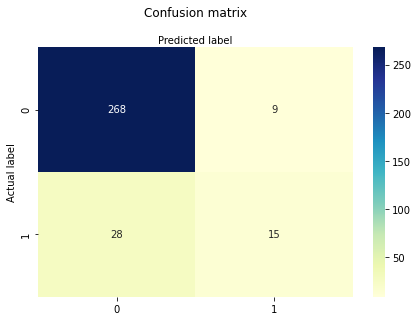

In [35]:
class_names=[1,2] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
with open ("modele/model_logreg.pkl", "wb") as file:
    pickle.dump(logreg, file)

### Logistic Regression - dane wyskalowane

In [41]:
logreg.fit(X_train_all_scaled,Y_train_all)

LogisticRegression(max_iter=1000)

In [42]:
Y_pred = logreg.predict(X_test)

In [43]:
# calculating the training and testing accuracies
print("Training accuracy :", logreg.score(X_train_all_scaled, Y_train_all))
print("Testing accuracy :", logreg.score(X_val, Y_val))

Training accuracy : 0.8794048551292091
Testing accuracy : 0.8046875


In [44]:
# classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           1       0.91      0.91      0.91       277
           2       0.40      0.40      0.40        43

    accuracy                           0.84       320
   macro avg       0.66      0.65      0.65       320
weighted avg       0.84      0.84      0.84       320



In [45]:
# confusion matrix
cnf = confusion_matrix(Y_test, Y_pred)
print(cnf)

[[252  25]
 [ 26  17]]


Text(0.5, 257.44, 'Predicted label')

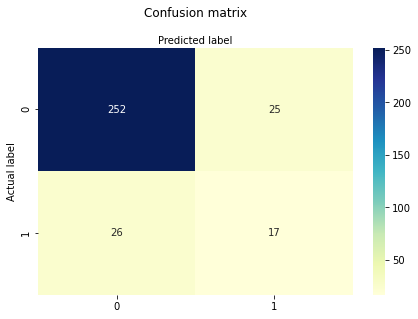

In [46]:
class_names=[1,2] # nazwy klas
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Wnioski - wybór modelu 

Porownójąc metryki widać że skalowanie danych nie wpłyneło znacząco na poprawę działanie modelu. 
Metryka "Testing Accoracy" jest niższa niż w przupadku danych niewyskalowanych. 

Wskażniki f1 są minimalnie niższe niż w modelu z danymi niewyskalowanymi. 
Patrząc na confusion matrix widac, że wyniki są minimalnie gorsze dla danych wyskalowanych. 

Opierając się na powyższych wnioskach do dalszej części projektu wybrałem model z danymi nie wyskalowanymi. 
